Merging the data

In [72]:
import pandas as pd

# File paths
user_details_path = "/content/User_details1.csv"
cooking_sessions_path = "/content/Cooking session.csv"
order_details_path = "/content/order_details.csv"

# Load datasets
user_details = pd.read_csv(user_details_path)
cooking_sessions = pd.read_csv(cooking_sessions_path)
order_details = pd.read_csv(order_details_path)

# Merge CookingSessions with OrderDetails on 'Session ID'
sessions_orders_merged = pd.merge(cooking_sessions, order_details, on='Session ID', how='outer', suffixes=('_cooking', '_order'))

# Merge with UserDetails using the  User ID column
final_merged_data = pd.merge(sessions_orders_merged, user_details, left_on='User_ID_cooking', right_on='User_ID', how='outer', suffixes=('_sessions_orders', '_user'))

# Drop the redundant User ID columns
final_merged_data = final_merged_data.drop(columns=['User_ID_cooking', 'User_ID'], errors='ignore')

# Fill NaN values with 0
final_merged_data.fillna(0, inplace=True)

# Save the merged dataset
output_path = "/content/DataAnalystIntern.csv"
final_merged_data.to_csv(output_path, index=False)

print(f"Merged dataset saved to {output_path}")

Merged dataset saved to /content/DataAnalystIntern.csv


In [56]:
print(final_merged_data.columns)

Index(['Session ID', 'Dish Name_cooking', 'Meal Type_cooking', 'Session Start',
       'Session End', 'Duration (mins)', 'Session Rating', 'Order ID',
       'User_ID_order', 'Order Date', 'Meal Type_order', 'Dish Name_order',
       'Order Status', 'Amount (USD)', 'Time of Day', 'Rating', 'User Name',
       'Age', 'Location', 'Registration Date', 'Phone', 'Email',
       'Favorite Meal', 'Total Orders'],
      dtype='object')


Relationship Between Cooking Sessions and User Orders by Bubble Chart


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


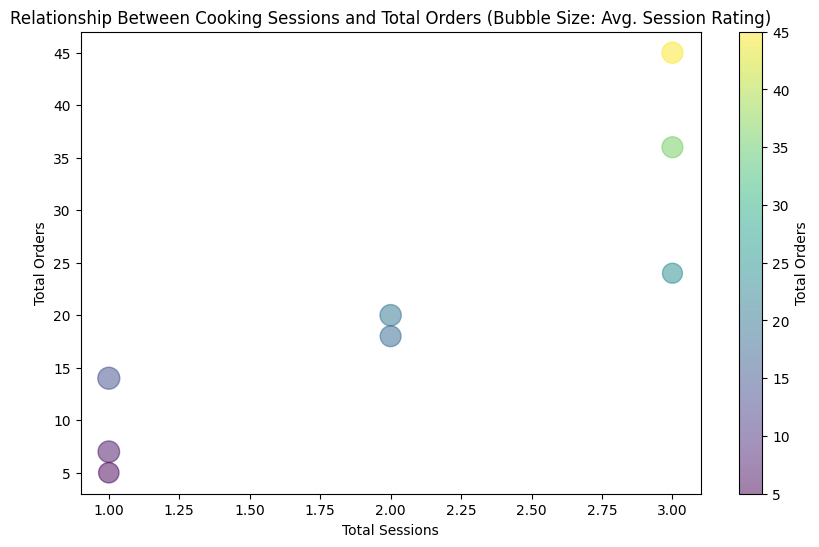

In [73]:
# Load the merged dataset
merged_data_path = "/content/DataAnalystIntern.csv"
merged_data = pd.read_csv(merged_data_path)

# Group by User_ID_order and calculate total sessions and orders
user_behavior = merged_data.groupby('User_ID_order').agg(
    Total_Sessions=('Session ID', 'count'),
    Total_Orders=('Total Orders', 'sum'),
    Avg_Session_Rating=('Session Rating', 'mean')
).reset_index()

# Create the bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(user_behavior['Total_Sessions'], user_behavior['Total_Orders'],
            s=user_behavior['Avg_Session_Rating'] * 50,
            alpha=0.5,
            c=user_behavior['Total_Orders'], cmap='viridis')  # Color bubbles based on Total Orders

plt.title('Relationship Between Cooking Sessions and Total Orders (Bubble Size: Avg. Session Rating)')
plt.xlabel('Total Sessions')
plt.ylabel('Total Orders')
plt.colorbar(label='Total Orders')  # Add colorbar to show order values
plt.show()

Top 3 Popular Dishes

<ipython-input-65-f57d4dd8cfe3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=popular_dishes.head(3), x='Frequency', y='Dish Name', palette='viridis')


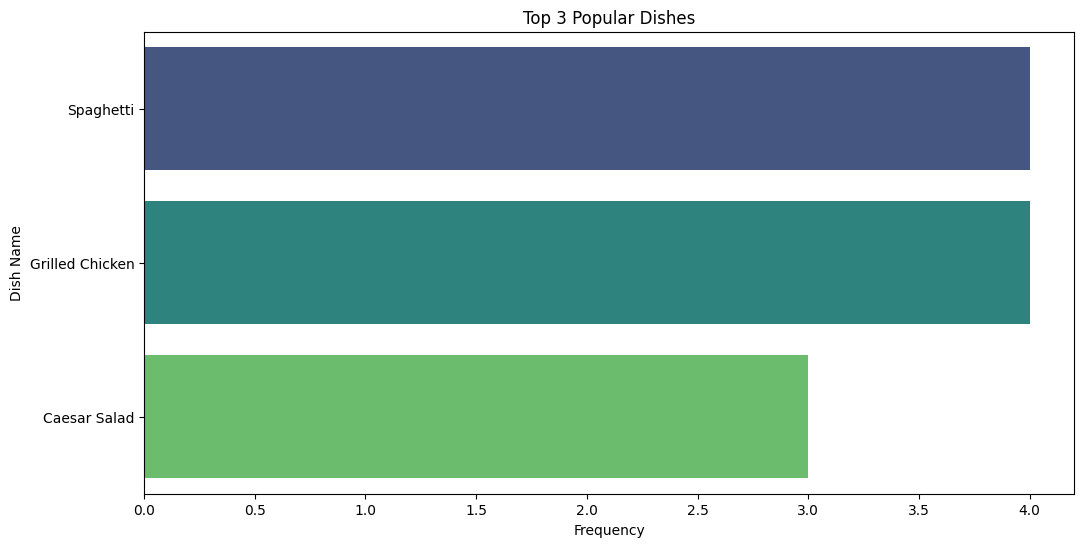

In [65]:
# Count frequency of each dish, excluding NaN values
dish_name_column = 'Dish Name_cooking'

# Filter out NaN values before calculating value_counts()
popular_dishes = merged_data[dish_name_column].dropna().value_counts().reset_index()
popular_dishes.columns = ['Dish Name', 'Frequency']

# Filter out dishes with 0 frequency
popular_dishes = popular_dishes[popular_dishes['Frequency'] > 0]

# Filter out the dish named '0'
popular_dishes = popular_dishes[popular_dishes['Dish Name'] != '0']

# Bar Plot: Top 3 Popular Dishes (without NaN, 0 frequency, and dish named '0')
plt.figure(figsize=(12, 6))
sns.barplot(data=popular_dishes.head(3), x='Frequency', y='Dish Name', palette='viridis')
plt.title('Top 3 Popular Dishes')
plt.xlabel('Frequency')
plt.ylabel('Dish Name')
plt.show()


Demographic Factors Influencing User Behavior

<ipython-input-66-35557524626e>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_analysis = merged_data.groupby('Age Group')[['Session ID', 'Amount (USD)']].count().reset_index()


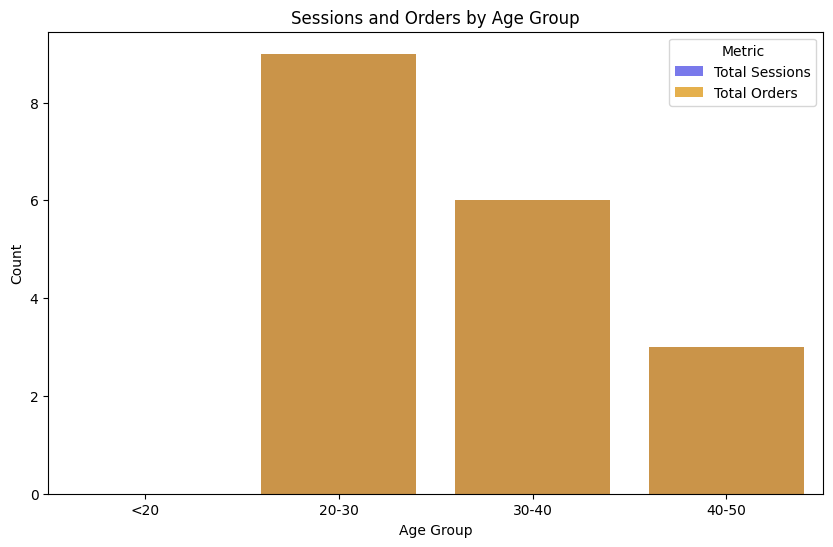

In [66]:
# Average sessions and orders by age group
merged_data['Age Group'] = pd.cut(merged_data['Age'], bins=[0, 20, 30, 40, 50], labels=['<20', '20-30', '30-40', '40-50'])


age_analysis = merged_data.groupby('Age Group')[['Session ID', 'Amount (USD)']].count().reset_index()
age_analysis.columns = ['Age Group', 'Total Sessions', 'Total Orders']

# Bar Plot: Sessions and Orders by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(data=age_analysis, x='Age Group', y='Total Sessions', label='Total Sessions', color='blue', alpha=0.6)
sns.barplot(data=age_analysis, x='Age Group', y='Total Orders', label='Total Orders', color='orange', alpha=0.8)
plt.title('Sessions and Orders by Age Group')
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.legend(title='Metric')
plt.show()

Session Ratings Distribution

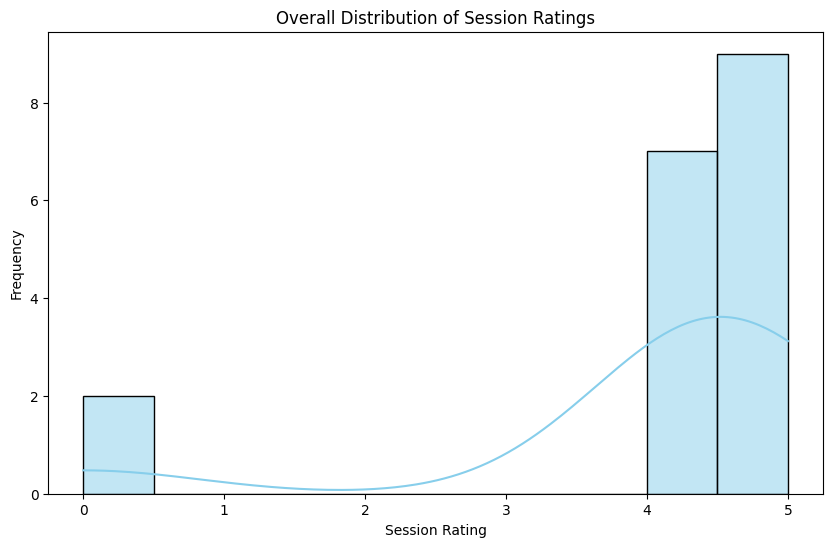

In [80]:
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_data, x='Session Rating', bins=10, kde=True, color='skyblue')  # kde=True adds a density curve
plt.title('Overall Distribution of Session Ratings')
plt.xlabel('Session Rating')
plt.ylabel('Frequency')
plt.show()

Favorite Meals Distribution

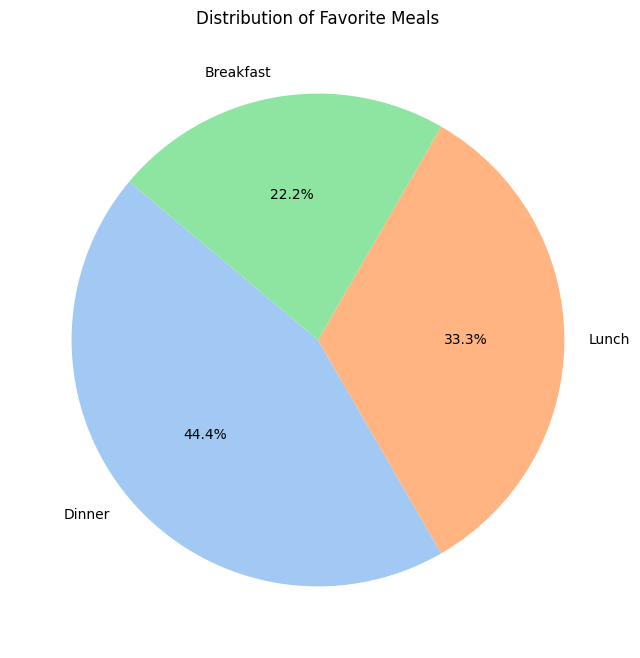

In [37]:
# Count of Favorite Meals
favorite_meals = merged_data['Favorite Meal'].value_counts().reset_index()
favorite_meals.columns = ['Favorite Meal', 'Count']

# Pie Chart: Favorite Meals
plt.figure(figsize=(8, 8))
plt.pie(favorite_meals['Count'], labels=favorite_meals['Favorite Meal'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Favorite Meals')
plt.show()


Heatmap for Dish and Meal Type Popularity

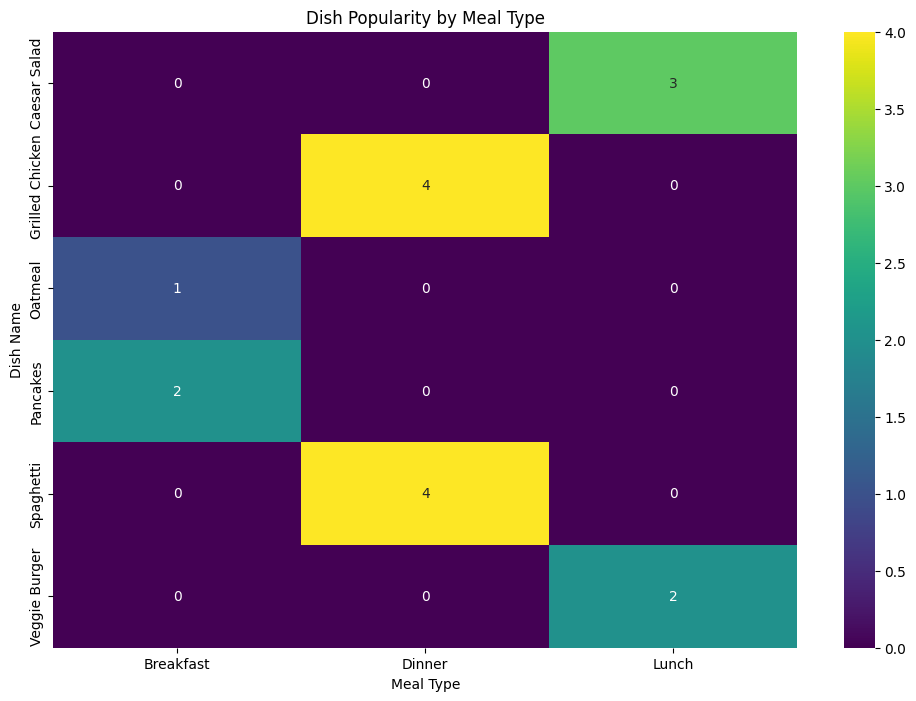

In [83]:
# Filter out rows with '0' in 'Dish Name_cooking' and 'Meal Type_cooking'
filtered_data = merged_data[
    (merged_data['Dish Name_cooking'] != '0') & (merged_data['Meal Type_cooking'] != '0')
]

# Create the heatmap data
dish_meal_popularity = filtered_data.groupby(['Dish Name_cooking', 'Meal Type_cooking'])['Session ID'].count().reset_index(name='Count')
dish_meal_popularity = dish_meal_popularity.pivot(index='Dish Name_cooking', columns='Meal Type_cooking', values='Count').fillna(0)

# Remove columns with all 0 values (if any remain after filtering)
dish_meal_popularity = dish_meal_popularity.loc[:, (dish_meal_popularity != 0).any(axis=0)]

# Remove rows with all 0 values (if any remain after filtering)
dish_meal_popularity = dish_meal_popularity.loc[(dish_meal_popularity != 0).any(axis=1)]

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(dish_meal_popularity, annot=True, cmap='viridis', fmt='g')
plt.title('Dish Popularity by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Dish Name')
plt.show()

Box Plots for Session Duration by Meal Type or Age Group

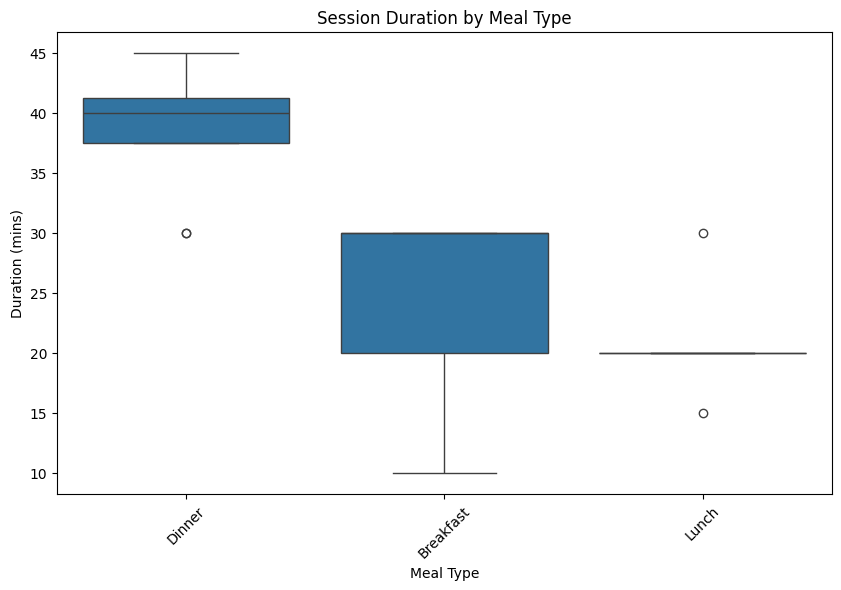

In [69]:
# Filter out rows with 'Meal Type_cooking' equal to '0'
filtered_data = merged_data[merged_data['Meal Type_cooking'] != '0']

# Create the box plot using the filtered data
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='Meal Type_cooking', y='Duration (mins)')
plt.title('Session Duration by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Duration (mins)')
plt.xticks(rotation=45)
plt.show()

Geographical Distribution,Analysis of Popular Dish and Favourite Meal

In [70]:
import folium
from geopy.geocoders import Nominatim
import pandas as pd

# Load your merged data from a CSV file
merged_data = pd.read_csv('/content/DataAnalystIntern.csv')

# Initialize geocoder
geolocator = Nominatim(user_agent="your_app_name")

# Create a base map
m = folium.Map(location=[40, -95], zoom_start=4)

# Iterate through your data and add markers
for index, row in merged_data.iterrows():
    location_name = row['Location']
    try:
        # Geocode the location name
        location = geolocator.geocode(location_name)
        if location:
            # Extract favorite meal and popular dishes
            favorite_meal = row['Favorite Meal']
            popular_dishes = row['Dish Name_cooking']

            # Create the popup content with HTML formatting
            popup_content = f"""
            <b>Location:</b> {location_name}<br>
            <b>Favorite Meal:</b> {favorite_meal}<br>
            <b>Popular Dish:</b> {popular_dishes}<br>
            <b>Latitude:</b> {location.latitude}<br>
            <b>Longitude:</b> {location.longitude}
            """
            # Add a marker with the popup
            folium.Marker(
                location=[location.latitude, location.longitude],
                popup=folium.Popup(popup_content, max_width=300),  # Popup with HTML content
                tooltip=location_name  # Display location name on hover
            ).add_to(m)
    except Exception as e:
        print(f"Error geocoding {location_name}: {e}")

# Display the map
m


Error geocoding Los Angeles: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Los+Angeles&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


Error geocoding Miami: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Miami&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
